In [1]:
import osmnx as ox

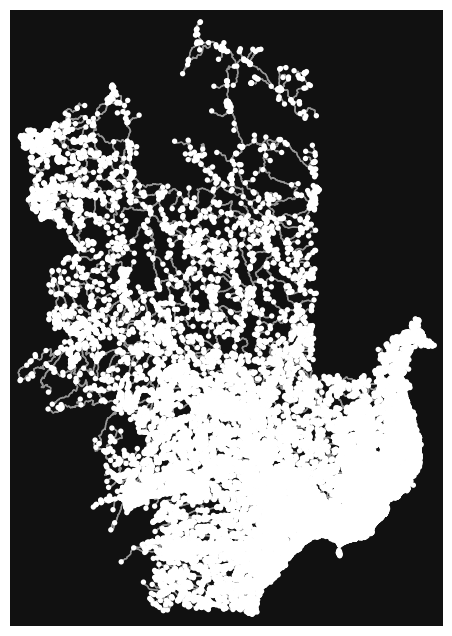

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
droad1 = ox.graph_from_place("Davao City, Philippines")
ox.plot_graph(droad1)

In [3]:
ox.save_graph_geopackage(droad1, filepath="droad1.gpkg")

C:\Users\User\Documents\Anaconda\Lib\site-packages\pyogrio\geopandas.py:275: UserWarning: More than one layer found in 'droad1.gpkg': 'nodes' (default), 'edges'. Specify layer parameter to avoid this warning.
  result = read_func(


<Axes: >

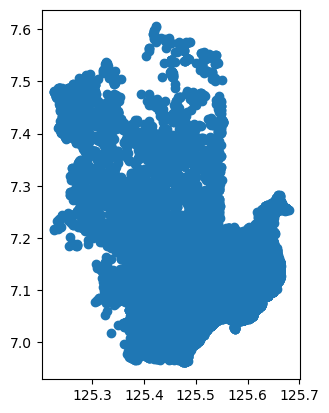

In [4]:
import geopandas as gpd
polygon = gpd.read_file(r"C:\Users\User\OJT UP Diliman\droad1.gpkg")
polygon.plot()

<Axes: >

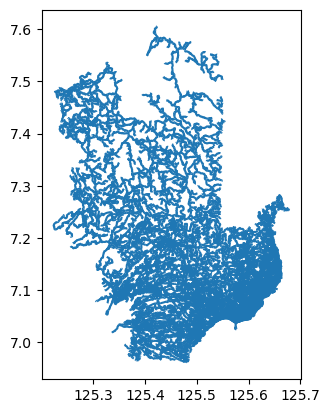

In [5]:
edges = gpd.read_file("droad1.gpkg", layer='edges')
edges.plot()

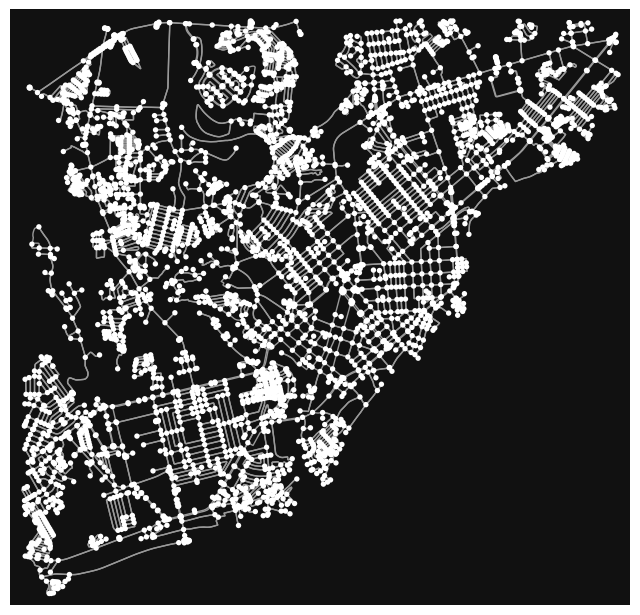

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [6]:
road2 = ox.graph_from_point((7.070157821838009, 125.60854859849263), dist = 4000, network_type = "drive" )
ox.plot_graph(road2)

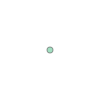

In [7]:
study_area = polygon["geometry"].iloc[0]
study_area

In [8]:
from shapely.geometry import Polygon, MultiPolygon
print(type(study_area))

<class 'shapely.geometry.point.Point'>


In [9]:
gdf = ox.geocode_to_gdf("Davao City, Philippines")
polygon = gdf.loc[0, 'geometry']

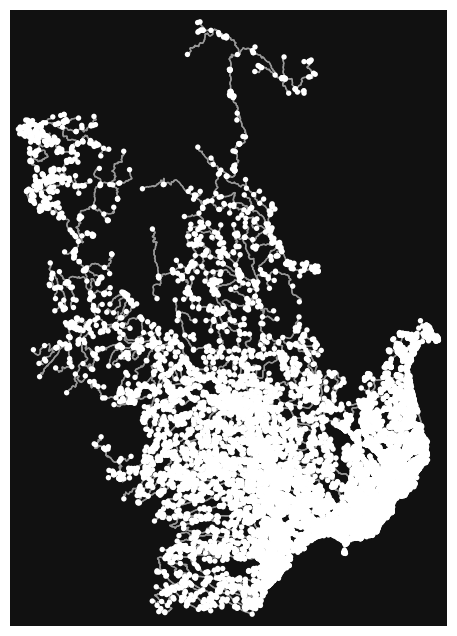

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [10]:
road3 = ox.graph_from_polygon(polygon, network_type="drive")
ox.plot_graph(road3)

In [12]:
gdf_nodes, gdf_edges = ox.convert.graph_to_gdfs(road3)
gdf_nodes.head()

,y,x,street_count,highway,junction,ref,geometry
osmid,,,,,,,
110955440,7.111142,125.643685,3,NaN,NaN,NaN,POINT (125.64369 7.11114)
110955592,7.109812,125.639258,3,NaN,NaN,NaN,POINT (125.63926 7.10981)
110955595,7.108650,125.641067,3,NaN,NaN,NaN,POINT (125.64107 7.10865)
110955824,7.108919,125.641351,3,NaN,NaN,NaN,POINT (125.64135 7.10892)
110955980,7.109148,125.641592,3,NaN,NaN,NaN,POINT (125.64159 7.10915)


In [13]:
G_proj = ox.projection.project_graph(road3)
nodes_proj = ox.convert.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.union_all().convex_hull.area
graph_area_m

2500356057.572513

In [14]:
ox.stats.basic_stats(G_proj, area =graph_area_m, clean_int_tol=15)

{'n': 25295,
 'm': 62607,
 'k_avg': 4.950148250642419,
 'edge_length_total': 8641793.62739268,
 'edge_length_avg': 138.0323865924366,
 'streets_per_node_avg': 2.5518877248468077,
 'streets_per_node_counts': {0: 0, 1: 6708, 2: 37, 3: 16443, 4: 2096, 5: 11},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.26519074915991303,
  2: 0.0014627396718719114,
  3: 0.6500494168808065,
  4: 0.08286222573631152,
  5: 0.00043486855109705475},
 'intersection_count': 18587,
 'street_length_total': 4396339.109286839,
 'street_segment_count': 32268,
 'street_length_avg': 136.24454906677946,
 'circuity_avg': 1.1083384775747025,
 'self_loop_proportion': 0.0014255609272344118,
 'clean_intersection_count': 12618,
 'node_density_km': 10.11655916900004,
 'intersection_density_km': 7.433741264052332,
 'edge_density_km': 3456.225204894466,
 'street_density_km': 1758.2852234073628,
 'clean_intersection_density_km': 5.046481264852441}

In [20]:
place = {"city": "Davao City", "country": "Philippines"}
G = ox.graph.graph_from_place(place, network_type = "drive", truncate_by_edge = True)
orig = ox.distance.nearest_nodes(G, X= 125.60518374991068, Y= 7.075674831905701)
dest = ox.distance.nearest_nodes(G, X= 125.59060617244484, Y=7.1121748795270605)

C:\Users\User\Documents\Anaconda\Lib\site-packages\osmnx\routing.py:338: UserWarning: The attribute 'travel_time' is missing or null on some edges.
  _verify_edge_attribute(G, weight)


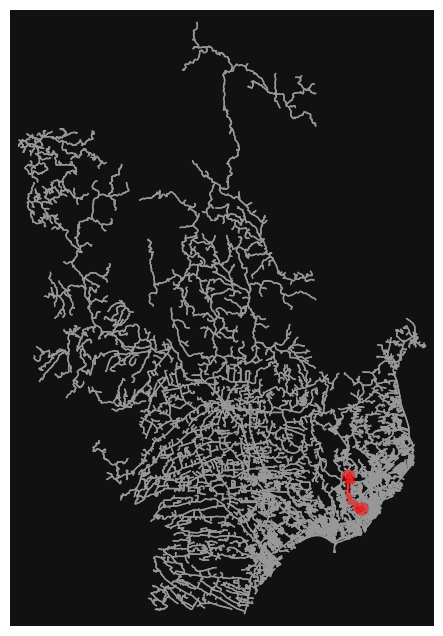

In [21]:
route = ox.routing.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot.plot_graph_route(G, route, node_size=0)

In [22]:
edge_lengths = ox.routing.route_to_gdf(G, route)["length"]
round(sum(edge_lengths))

6691

In [23]:
orig_x = G.nodes[orig]["x"]
orig_y = G.nodes[orig]["y"]
dest_x = G.nodes[dest]["x"]
dest_y = G.nodes[dest]["y"]
round(ox.distance.great_circle(orig_y, orig_x, dest_y, dest_x))

4313

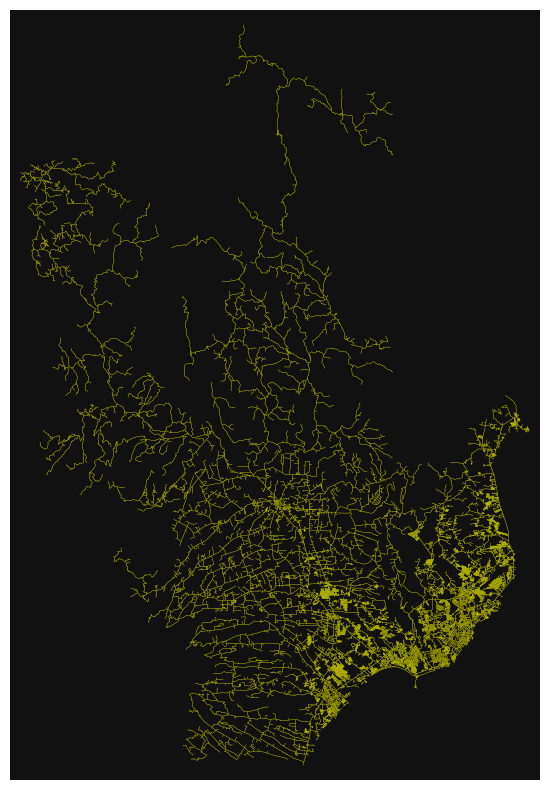

In [24]:
place = {"city": "Davao City", "country": "Philippines"}
G = ox.graph.graph_from_place(place, network_type = "drive", truncate_by_edge = True)
fig, ax = ox.plot.plot_graph(G, figsize = (10,10), node_size= 0, edge_color= "y", edge_linewidth = 0.2)

In [25]:
place = "Davao City, Philippines"
tags = {"building": True}
gdf = ox.features.features_from_place(place, tags)
gdf.shape

(81311, 293)

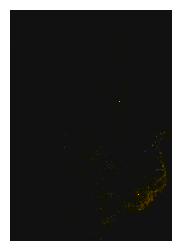

In [26]:
fig, ax = ox.plot.plot_footprints(gdf, figsize=(3, 3))

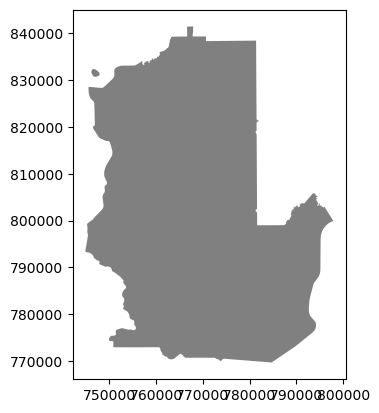

In [27]:
city = ox.geocoder.geocode_to_gdf("Davao City, Philippines")
city_proj = ox.projection.project_gdf(city)
ax = city_proj.plot(fc="gray", ec="none")
_ = ax.axis()

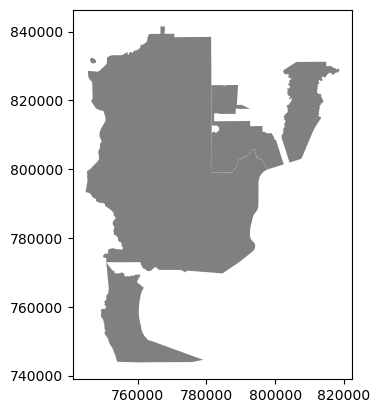

In [28]:
place_names = ["Davao City, Philippines",
               "Panabo City, Philippines",
               "Tagum City, Philippines",
               "Digos City, Philippines"]
east_bay = ox.geocoder.geocode_to_gdf(place_names)
east_bay = ox.projection.project_gdf(east_bay)
ax = east_bay.plot(fc="gray")
_ = ax.axis()

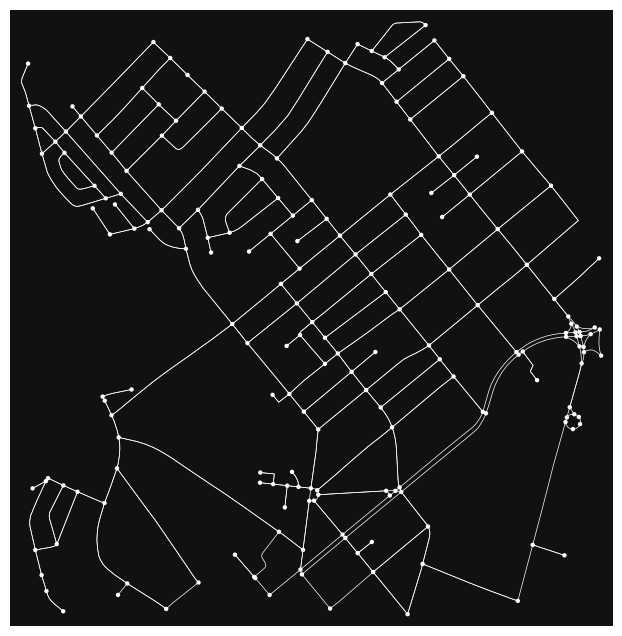

In [29]:
location_point = ( 7.075674831905701,125.60518374991068)
G = ox.graph.graph_from_point(location_point, dist = 750, dist_type="bbox", network_type="drive")
fig, ax = ox.plot.plot_graph(G, node_size=10, edge_color="w", edge_linewidth=0.5)